# Dependence of $G'_0$ on solid volume fraction

_Produces Figures 9_

### Import packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter # for scalars in semilogy labels
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import ConnectionPatch
from scipy.optimize import curve_fit

import numpy as np
from pranzo import Analyzer
from bamboost import Manager

import colors as c
from utilities import set_plot_theme, find_closest_index
set_plot_theme()

### Specify the path to the database

The database can be downloaded from the [ETH Research Collection](https://www.research-collection.ethz.ch/)

In [2]:
database_path = ('../out')

db = Manager(database_path)

### Generate the figure

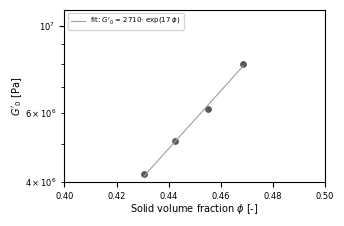

In [3]:
# read the data
exps = [
    db['opc36'], db['opc38'],
    db['opc40'], db['opc42'],
]

# set w/c ratios
wcs = [0.36, 0.38, 0.40, 0.42]

# function computing volume fractionfrom w/c ratio
def phi(wc):
    phi = (1/3.15) / ( 1/3.15 + wc )
    return phi

# set onset times and colors
onset_times = [7500, 7800, 8500, 8700, 8700]
colors = [c.blue34, c.blue36, c.blue38, c.blue40, c.blue42]

# initialize empty lists
G0_list = []
phis = []

# loop over experiments to retrieve G0
for i in range(len(exps)):
    exp = exps[i]
    a = Analyzer(exp)
    rheo = a.rheo

    t = np.linspace(0, 4*3600, 20000)
    G = rheo.interpolate('storage_modulus_Pa', t, cutoff=0.012)

    idx_onset = find_closest_index(t, onset_times[i])
    G0 = G[idx_onset]
    G0_list.append(G0)
    phis.append(phi(wcs[i]))

G0_list = np.array(G0_list)
phis = np.array(phis)

# define figure
fig, ax = plt.subplots(figsize=(90/25.4, 60/25.4))

# define exponential function for fiting
def expfit(x, a, b):
    return a*np.exp(b*x)

# fit exponential to the data
var = G0_list
p, pc = curve_fit(expfit, phis, var)
dd = np.linspace(phis[0], phis[-1])

# scatter data, plot exponential fit
ax.scatter(phis, G0_list, c=c.c_opc_36_grey, s=15)
ax.plot(dd, expfit(dd, *p), c=c.c_opc_40_grey, 
        label=fr"fit: $G'_0$ = {round(p[0])}$\cdot$ exp({round(p[1])} $\phi$)")

# set axis scale and limits
ax.set_yscale('log')
ax.set_xlim(0.4, 0.5)
ax.set_ylim(None, 1.1e7)

# set axis labels
ax.set_xlabel(r"Solid volume fraction $\phi$ [-]")
ax.set_ylabel(r"$G'_0$ [Pa]")

# add legend
ax.legend(loc='upper left')

# display figure
plt.tight_layout()
plt.show()